# 4.9.2. Data Visualization - Part 2

## This script contain following points:

### 01. Import the necessary analysis, visualization libraries and dataset

### 02. Create a histogram of the “order_hour_of_day” column.

### 03. Create a bar chart from the “loyalty_flag” column

### 04. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

### 05. Explore whether there’s a connection between age and family situation

### 06. Explore whether there’s a connection between age and spending power (income)

### 07. Export your visualizations

## 01. Import the necessary analysis, visualization libraries and dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create path
path = r'C:\Users\Quinn\OneDrive\Documents\CF - Data Analyst\Data Immersion\Instacart Basket Analysis'

In [5]:
# Import orders_products_merged dataset
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [6]:
ords_prods_all.shape

(32404854, 32)

## 02. Create a histogram of the “order_hour_of_day” column

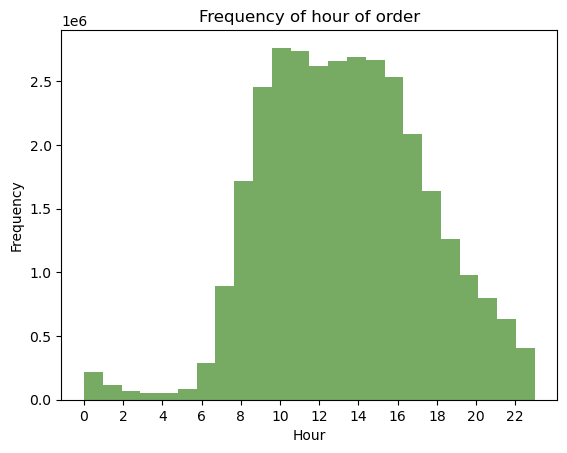

In [7]:
hist_order_hour = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24, grid = False, color = '#77aa63')
plt.title('Frequency of hour of order')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,24,2))
plt.show()

#### A peak in order frequency during the late morning and early afternoon hours. Specifically, in the hours between 10 AM and 2 PM

#### Most minor orders are to happen at midnight to early morning, especially from 0 AM to 6 AM.

#### The orders steadily decrease from 5PM to midnight.

In [8]:
# Exporting chart
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

## 03. Create a bar chart from the “loyalty_flag” column

In [9]:
ords_prods_all['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243985
Name: count, dtype: int64

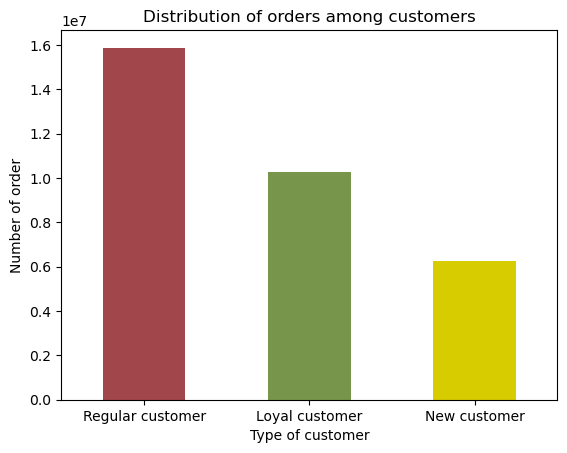

In [48]:
# Create bar chart for loyalty_flag
bar = ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['#a1464b','#78964b','#d6cc00'], rot = 0)
plt.title('Distribution of orders among customers')
plt.xlabel('Type of customer')
plt.ylabel('Number of order')
plt.show()

#### Regular customers order the most from IC. Next is loyal customers. New customers order the least from IC.

In [49]:
# Exporting chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_distribution_of_orders.png'))

## 04. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [40]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [42]:
# Store 70% of the sample in the dataframe big
big = ords_prods_all[dev]

In [43]:
# Store 30% of the sample in dataframe small
small = ords_prods_all[~dev]

In [44]:
# Create df with only necessary columns
df_expenditure = small[['order_hour_of_day','prices']]

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


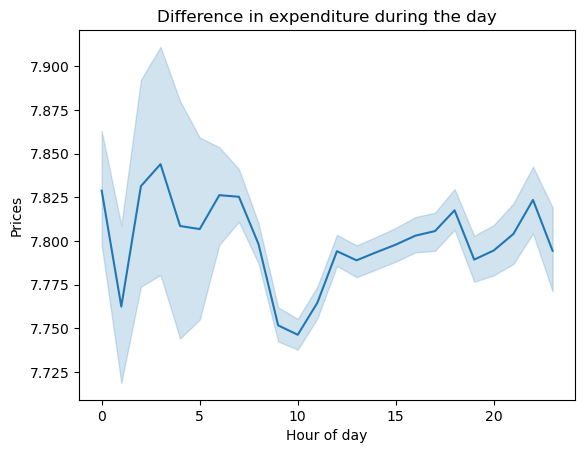

In [46]:
# Creat line chart
line = sns.lineplot(data = df_expenditure, x = 'order_hour_of_day',y = 'prices')
plt.title('Difference in expenditure during the day')
plt.xlabel('Hour of day')
plt.ylabel('Prices')
plt.show()

#### The chart shows random distribution of price and hour of day, meaning that customers don't spend more money at a specific hour of the day

In [47]:
# Exporting chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_difference_in_expenditure.png'))

## 05. Explore whether there’s a connection between age and family situation

In [50]:
small.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'dependants', ' family_status',
       'income', '_merge'],
      dtype='object')

In [51]:
# Create df with only necessary columns
df_age = small[['Age','dependants']]

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


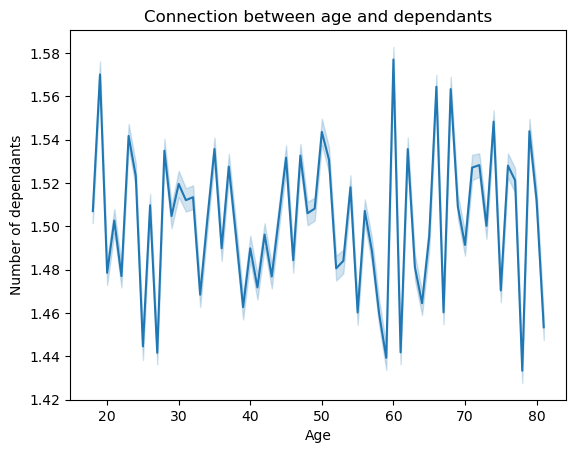

In [52]:
# Creat line chart
line_age = sns.lineplot(data = df_age, x = 'Age',y = 'dependants')
plt.title('Connection between age and dependants')
plt.xlabel('Age')
plt.ylabel('Number of dependants')
plt.show()

#### The chart shows a random distribution between age and number of dependants. Meaning that there is no connection between these two variables.

In [53]:
# Exporting chart
line_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_dependant.png'))

## 06. Explore whether there’s a connection between age and spending power (income)

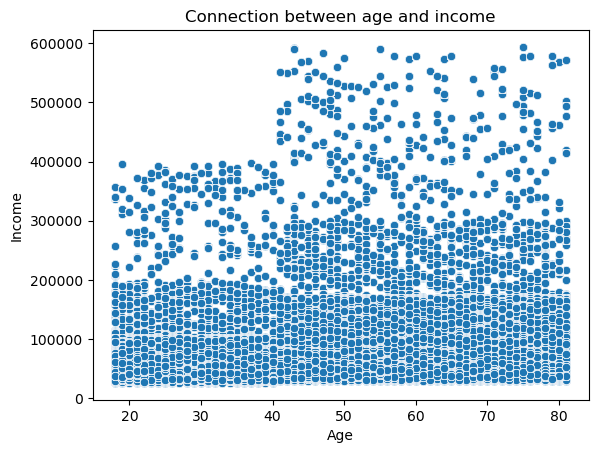

In [54]:
# Create scatterplots
plot = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_all)
plt.title('Connection between age and income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#### The majority of income for all ages is under 200K. The maximum income of people who are 40 and below is around 400k, and around 600K for those over 40. 

In [55]:
# Exporting chart
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_age_and_income.png'))